<a href="https://colab.research.google.com/github/baharuluss/CNN_Clothes_Classification/blob/main/CNN_Algoritmas%C4%B1_ile_Giysi_S%C4%B1n%C4%B1fland%C4%B1rmas%C4%B1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Evrişimsel Sinir Ağları (CNN) Kullanarak Giysi Sınıflandırması
## Kodlama öncesi bilinmesi gereken bazı terimler:
 * **CNNs:** CNN (Convolutional Neural Network), özellikle görsel veriler üzerinde başarıyla çalışan bir derin öğrenme (deeplearning) modelidir. Temel olarak, bir görsel hiyerarşiyi öğrenmek ve görsel verilerde desenleri algılamak için tasarlanmıştır. CNN'ler, özellikle Bilgisayarlı Görü (Computer Vision) alanında geniş bir kullanım alanına sahiptir.

* **Convolutional Layers:** CNN'ler, konvolüsyon (Convolution) katmanları içerir. Bu katmanlar, girdi verileri üzerinde belirli desenleri algılamak ve öğrenmek için kullanılır. Konvolüsyon işlemi, bir filtre (Kernel) ile girdi veri üzerinde kaydırma (Stride) işlemi yaparak özellik haritası çıkarır.

* **Padding:** CNN gibi derin öğrenme modellerinde konvolüsyon işlemeleri sırasında giriş verisinin kenarlarına eklenen ekstra piksellerdir. Bu, çıkış boyutunu kontrol etmek ve kenar piksellerini daha iyi işlemek için kullanılır. Padding işlemi, genellikle sıfırlarla doldurulan ek piksellerin eklenmesini içerir.

* **Pooling:** CNN'ler genellikle pooling katmanları içerir. Pooling, özellik haritalarının boyutunu küçültmek ve öğrenilecek parametre sayısını azaltmak için kullanır. Maxpooling ve average pooling yaygın olarak kullanılan tekniklerdir.

* **Maxpooling:** MaxPooling (Maksimum Havuzlama), Evrişimsel Sinir Ağları (CNNs) gibi derin öğrenme modellerinde sıkca kullanılan bir katman türüdür. Maxpooling, özellik haritalarındaki özellikleri örneklerken, her bölge içindeki maksimum değeri seçer ve bu değeri kullanılır. Bu işlem, özellik haritasını örnekleme yaparak boyutunu küçültmek ve önemli özellikleri örneklemek için kullanır.

* **Stride:** Stride (Kaydırma), Evrişimsel Sinir Ağları (CNNs) gibi derin öğrenme modellerinde kullanılan konvelüsyon işlemi sırasında filtrenin giriş verisi üzerinde kaymasını belirleyen parametredir. Stride değeri, filtre veya kernelin giriş verisi üzerinde her adımda ne kadar kaymasını gerektiğini belirtir.

* **Downsampling:** Downsampling, Evrişimsel Sinir Ağları (CNNs) veya diğer bir öğrenme modellerinde, özellik haritasının boyutunu küçültme işlemine denir. Bu işlem, genelikle pooling katmanları veye stride parametresi kullanılarak gerçekleştirilir.


## Proje için Gerekli Kütüphanelerin Yüklenmesi



In [4]:
import tensorflow as tf #tensorflow kütüphanesi içeri aktarıldı.bu derin öğrenme ve makine öğrenmesi uygulamaları geliştirmek için kullanılan popüler bir açık kaynak kodlu kütüphanedir.

#tensorflow verisetleri
#kütüphane içeri aktarıldı. Standart veri kümelerine kolayca erişim sağlamamızı ve bu veri kümesini kullanarak modellerimizi eğitmemizi sağlar.
import tensorflow_datasets as tfds
#veri kümesi yüklenirken çıkan progess barı gizler.
tfds.disable_progress_bar()
# math modülünü içe aktarır. Bu modül, matematiksel işlemler için bir dizi fonksiyon sağlar.
import math
# numpy modülünü np takma adıyla içe aktarır. Numpy, bilimsel hesaplamalar için kullanılan güçlü bir kütüphanedir.
import numpy as np
# matplotlib.pyplot modülünü plt takma adıyla içe aktarır. Matplotlib, grafik çizimleri için kullanılan bir kütüphanedir.
import matplotlib.pyplot as plt
# logging modülünü içe aktarır. Bu modül, uygulama üzerinde loglama yapmak için kullanılır.
import logging
# Tensorflow'un get_logger fonksiyonunu kullanarak bir logger (günlük) oluşturur.
logger= tf.get_logger()
# Logger'ın seviyesini ERROR seviyesine ayarlar. Bu, sadece hata mesajlarını görüntülemesini sağlar.
logger.setLevel(logging.ERROR)

##Fashion-Mnist Veri Setinin Yüklenmesi





In [5]:
#'fashion_mnist' veri setini yükler ve ilgili bilgileri 'metadata' değişkenine atar
dataset, metadata = tfds.load('fashion_mnist', as_supervised= True, with_info= True)
# Eğitim (train) ve test (test) veri kümelerini ayrıştırır
train_ds, test_ds = dataset['train'], dataset['test']

* tfds.load('fashion_mnist', as_supervised=True, with_info=True): Bu satır, 'fashion_mnist' adlı veri setini yükler. as_supervised=True parametresi, veri setinin eğitim ve etiket verilerini çiftler halinde döndürmesini sağlar. with_info=True parametresi ise veri seti hakkında meta bilgileri (metadata) elde etmenizi sağlar.

* train_ds, test_ds = dataset['train'], dataset['test']: Bu satır, yüklenen veri setini eğitim (train) ve test (test) veri kümelerine ayırır. Bu iki değişken, sırasıyla eğitim ve test veri kümelerini temsil eder. Böylece, train_ds ve test_ds değişkenleri üzerinden Fashion-MNIST veri setine erişebilirsiniz. Bu veri kümeleri, sırasıyla eğitim ve test verilerini içerir ve her bir örnek, görüntü ve etiket çifti olarak kullanılabilir. Bu veri seti, genellikle makine öğrenimi modellerini eğitmek ve değerlendirmek için kullanılan bir görüntü sınıflandırma veri setidir.

In [10]:
#metadata değişkeni, yüklenen veri setinin meta bilgilerini içerir.Bu meta bilgileri, veri setinin özelliklerini, boyutlarını ve etiket bilgilerini içerir.
# 'label' özelliğinin içindeki 'names' özelliği, veri setindeki sınıf isimlerini içerir.
# Bu satır, sınıf isimlerini 'class_names' değişkenine atar.
class_names = metadata.features['label'].names

#'class_names' değişkenindeki sınıf isimlerini ekrana yazdırır.
# format() fonksiyonu ile '{}' içine 'class_names' değişkeni yerleştirilir.
# Bu satır, ekrana "Class names: [sınıf1, sınıf2, ...]" şeklinde bir çıktı verir.
print('Class names: {}'.format(class_names))

Class names: ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


## Veri Setimizdeki Eğitim ve Test Setindeki Görsel Sayısını Öğrenmek

In [11]:
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples
print('Number of images in train set: {}'.format(num_train_examples))
print('Number of images in test set: {}'.format(num_test_examples))

Number of images in train set: 60000
Number of images in test set: 10000


## Görüntüleri [0,1] Aralığında Normalize Ederek Veri Kümesini Ön İşleme Yapma

Bu işlem, piksel değerlerini normalize etmek için kullanılır, bu da modelin daha iyi öğrenmesine yardımcı olabilir.

In [12]:
def normalize(images, labels):
  # Görüntü piksel değerlerini float32 türüne dönüştürür.
  images = tf.cast(images, tf.float32)
  # Görüntü piksel değerlerini [0,1] aralığına normalize eder.
  images /= 255
  # Normalize edilmiş görüntüler ve etiketleri döndürür.
  return images, labels

Eğitim veri kümesini normalize etme ve önbelleğe alma

In [13]:
#Eğitim veri kümesine normalize işlemlerini uygular.
trains_ds = train_ds.map(normalize)
#Test veri kümesine normalize işlemini uygular.
test_ds = test_ds.map(normalize)

Veri Kümesini Bellekte Önbelleğe Alma

In [14]:
#Eğitim veri kümesini önbelleğe alır,böylece daha hızlı eğitim yapabilir.
train_ds = train_ds.cache()
#Test veri kümesini önbelleğe alır.
test_ds = test_ds.cache()

İşlenen Veri Kümesini Keşfetme
Tek Bir Görüntü ile Görselleştirme

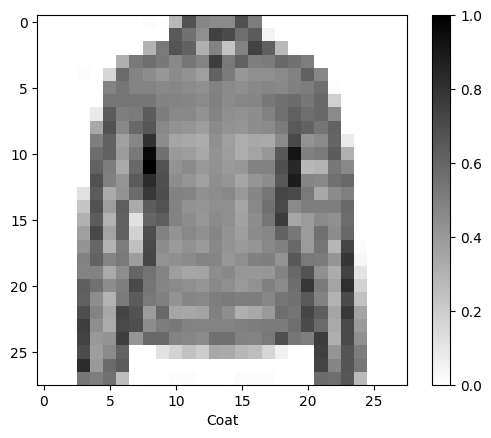

In [25]:
#test_ds'ten bir görüntü ve etiketi alma işlemi
for image, label in test_ds.take(1):
  break
#Görüntüyü numpy dizinine dönüştürülmesi ve boyutunun(28*28) olarak yeniden şekillendirilmesi işlemi
image = image.numpy().reshape((28,28))
#Yeni bir çizim penceresi oluşturma
plt.figure()
#Görüntüyü siyah-beyaz renk haritasıyla görselleştirme işlemi
plt.imshow(image, cmap=plt.cm.binary)
#Renk çubuğu ekleme işlemi
plt.colorbar()
#Izgara çizgilerini kaldırma işlemi
plt.grid(False)
#Eksen etiketlerini ayarlama işlemi
plt.xlabel(class_names[label])
#Görüntüyü göster
plt.show()


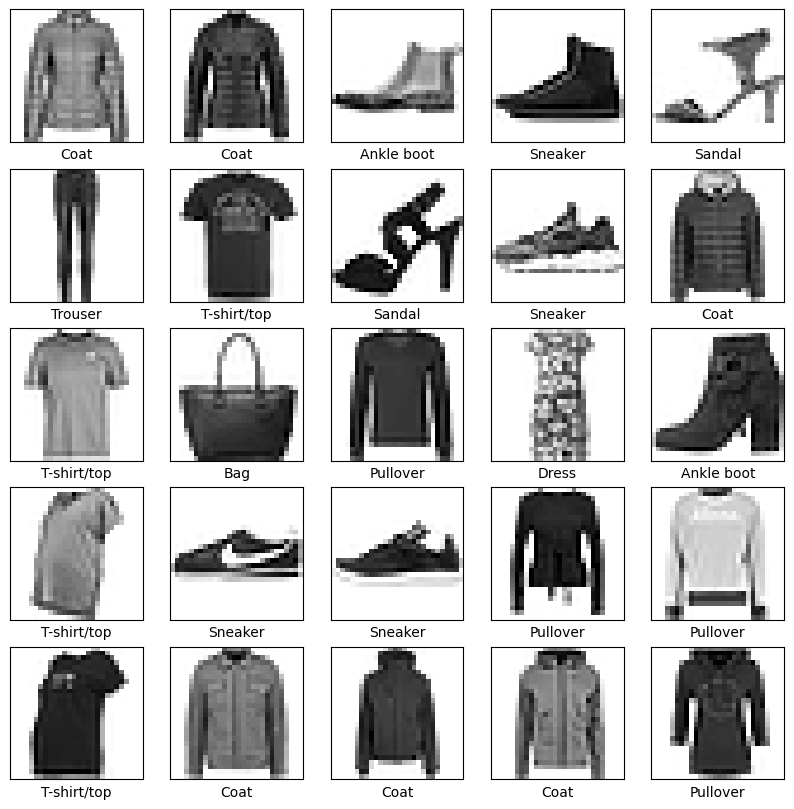

In [28]:
#Yeni bir çizim penceresi oluşturur ve boyutunu belirler
plt.figure(figsize=(10, 10))
#test_ds üzerinde iterasyon yaparak 25 örneği görselleştirme işlemi
for i, (image, label) in enumerate(test_ds.take(25)):
  #görüntüyü numpy dizisine dönüştürme ve boyutunu(28*28) olarak yeniden şekillendirme işlemi
  image=image.numpy().reshape((28,28))
  #5x5 bir alt çizim penceresi oluşturma ve görselleştirmeyi yerleştirme işlemi
  plt.subplot(5, 5, i + 1)
  #Eksen işaretlerini kapatma işlemi
  plt.xticks([])
  plt.yticks([])
  #ızgara çizgilerini kaldırma işlemi
  plt.grid(False)
  #Siyah-beyaz renk haritası ile görüntüyü gösterme işlemi
  plt.imshow(image, cmap=plt.cm.binary)
  #eksen altındaki etiketi, görüntünün gerçek sınıf adıyla ayarlama işlemi
  plt.xlabel(class_names[label])
#çizimi gösterme işlemi
plt.show()



##Modelin Oluşturulması

In [29]:
# Sequential modeli oluşturur. Katmanları sıralı olarak eklemek için kullanılır
model = tf.keras.Sequential([
    #Giriş katmanı: 28x28 piksel boyutundaki görüntüyü düzleştirir.(1D vektöre çevirir)
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
    #Tam bağlı (Dense) katman: 128 nörona sahip, aktivasyon fonksiyonu olarak ReLU (Rectified Linear Unit) kullanılır.
    tf.keras.layers.Dense(units=128, activation=tf.nn.relu),
    #Çıkış katmanı: 10 nörona sahip, aktivasyon fonksiyonu olarak softmax kullanılır. Çoklu sınıflandırma problemlerinde kullanılır.Bu her bir sınıf için olasılık dağılımını üretir
    tf.keras.layers.Dense(units=10, activation=tf.nn.softmax)
])

Bu ağ üç katmana sahiptir.

* Input (Giriş):Bu katman, 28 X 28 piksel boyutundaki 2D dizi görüntülerini, 1D 784 piksel (28*28) dizisine dönüştürmek için kullanılır.

* Hidden (Gizli):128 nöronlu yoğun bir katmandır. Her bir nöron, önceki katmandaki 784 düğümden gelen girişi alır, eğitim sırasında öğrenilecek olan gizli parametrelere göre ağırlıklandırır ve bir sonraki katmana tek bir değer çıkarır.

* Output (Çıkış):Bu, 10 düğmeli softmax çıkış katmanıdır. Her bir düğüm, bir giyim sınıfını temsil eder. Önceki katmandaki 128 düğümden gelen girişi alır ve görüntünün o sınıfa ait olma olasılığını temsil eden [0,1] aralığında bir değer çıkarır. 10 düğümün tüm değerlerinin toplamı 1'dir.







